# 3/23回家作業解答
### 中電會三月主題課程(2024/3/23)

<table class="tfo-notebook-buttons" align="left">
  <td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ChiuDeYuan/SCAICT_lecture/blob/main/0323/homework_0323.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ChiuDeYuan/SCAICT_lecture/blob/main/0323/homework_0323.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
</table>

## Useful links

* Diabetes Dataset : https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download
* Linear Models (Scikit-learn) : https://scikit-learn.org/stable/modules/linear_model.html
* SGD (Scikit-learn) : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
* Slides : https://hackmd.io/@ChiuChiuCircle/machine_learning_1

## Imports

In [6]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [7]:
import statsmodels.api as sm

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loads data

In [9]:
dataset_path = 'https://raw.githubusercontent.com/ChiuDeYuan/SCAICT_lecture/main/datasets/diabetes.csv'
dataset = pd.read_csv(dataset_path)

In [10]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
dataset.shape

(768, 9)

## 縮放數據

In [12]:
scaler = StandardScaler()

vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dataset[vars] = scaler.fit_transform(dataset[vars])

In [13]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [14]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.000000


## 篩選特徵

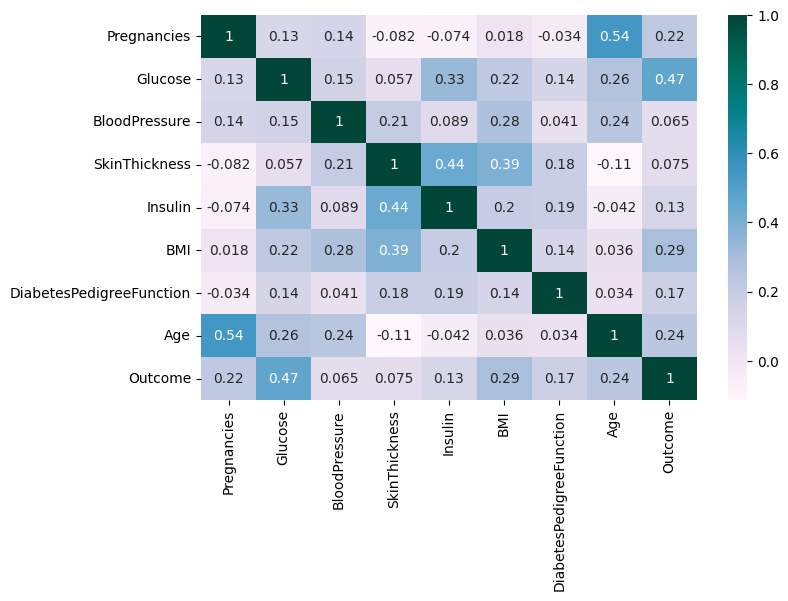

In [15]:
plt.figure(figsize = (8, 5))
sns.heatmap(dataset.corr(), annot = True, cmap="PuBuGn")
plt.show()

In [16]:
dataset_y = dataset.pop('Outcome')
dataset_x = dataset

In [17]:
reg = linear_model.LinearRegression(fit_intercept = True)

In [18]:
rfe = RFE(reg, n_features_to_select=1)
rfe = rfe.fit(dataset_x, dataset_y)

In [19]:
list(zip(dataset_x.columns, rfe.support_, rfe.ranking_))

[('Pregnancies', False, 3),
 ('Glucose', True, 1),
 ('BloodPressure', False, 5),
 ('SkinThickness', False, 8),
 ('Insulin', False, 7),
 ('BMI', False, 2),
 ('DiabetesPedigreeFunction', False, 4),
 ('Age', False, 6)]

In [20]:
col = dataset_x.columns[rfe.support_]
col

Index(['Glucose'], dtype='object')

In [21]:
dataset_x = dataset_x[col]

In [22]:
dataset_x = sm.add_constant(dataset_x)

In [23]:
dataset_x.head()

,const,Glucose
0,1.0,0.848324
1,1.0,-1.123396
2,1.0,1.943724
3,1.0,-0.998208
4,1.0,0.504055


## 分割資料集

In [24]:
dataset_x, dataset_y = shuffle(dataset_x, dataset_y, random_state=77777)

In [25]:
dataset_x_train = dataset_x[:-30]
dataset_x_test = dataset_x[-30:]

dataset_y_train = dataset_y[:-30]
dataset_y_test = dataset_y[-30:]

In [26]:
print(f"{dataset_x_train.shape}\n{dataset_x_test.shape}")

(738, 2)
(30, 2)


## 訓練模型

In [27]:
reg = sm.OLS(dataset_y_train,dataset_x_train).fit()

## 預測&評估

In [28]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           9.36e-39
Time:                        05:37:42   Log-Likelihood:                -416.89
No. Observations:                 738   AIC:                             837.8
Df Residuals:                     736   BIC:                             847.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3523      0.016     22.450      0.0

In [29]:
prediction = reg.predict(dataset_x_test)

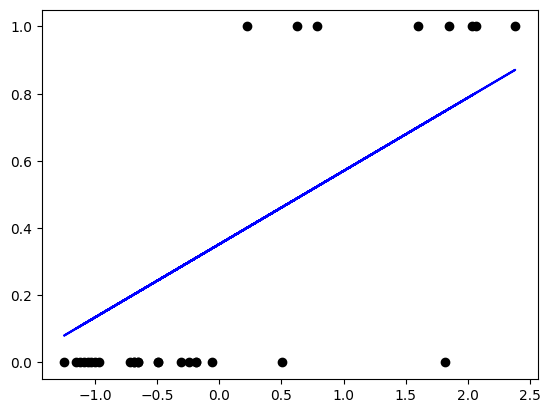

In [30]:
plt.scatter(dataset_x_test['Glucose'], dataset_y_test, color="black")
plt.plot(dataset_x_test['Glucose'], prediction, color="blue")
plt.show()

## 結語 : 其實迴歸也可以做二元分類
## 但有更好的作法-----logistic regression (用sigmoid進行二元分類)

## 畫出y值

In [31]:
dataset_x_test.head()

,const,Glucose
420,1.0,-0.059293
210,1.0,-1.248585
597,1.0,-0.998208
253,1.0,-1.092099
318,1.0,-0.184482


In [32]:
dataset_y_test.head()

420    0
210    0
597    0
253    0
318    0
Name: Outcome, dtype: int64

In [33]:
dataset_test = pd.merge(dataset_x_test, dataset_y_test, left_index=True, right_index=True, sort=True)

In [34]:
dataset_test = dataset_test.sort_values(by=['Outcome'], ascending=True)

In [35]:
dataset_test.head()

,const,Glucose,Outcome
1,1.0,-1.123396,0
697,1.0,-0.685236,0
639,1.0,-0.653939,0
625,1.0,-0.966911,0
613,1.0,-0.497453,0


In [36]:
dataset_test_0 = dataset_test[:-8]
dataset_test_1 = dataset_test[-8:]

In [37]:
dataset_test_0 = dataset_test_0.drop('Outcome', axis=1)
dataset_test_1 = dataset_test_1.drop('Outcome', axis=1)

In [38]:
prediction_0 = reg.predict(dataset_test_0)
prediction_1 = reg.predict(dataset_test_1)

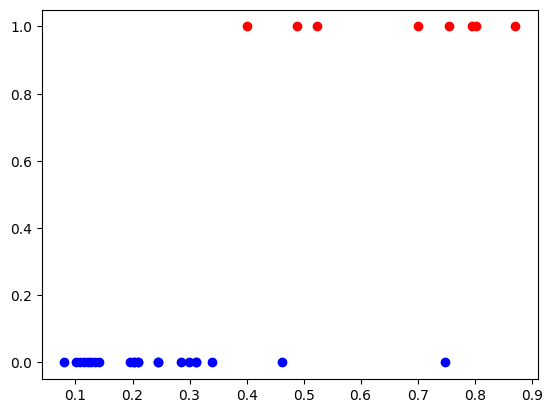

In [39]:
plt.scatter(prediction_0, np.zeros_like(prediction_0), color='blue')
plt.scatter(prediction_1, np.ones_like(prediction_1), color='red')
plt.show()

## Sigmoid

In [40]:
def sigmoid(x):
    return 1. / (1. + np.exp((-x+0.5)*15))

def plot_sigmoid():
    x = np.arange(0, 1, 0.01)
    y = sigmoid(x)
    plt.plot(x, y)

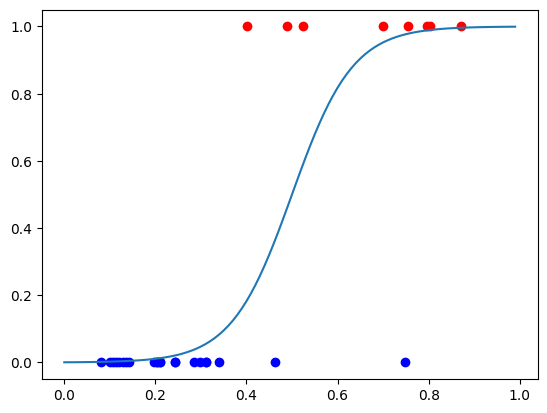

In [41]:
plt.scatter(prediction_0, np.zeros_like(prediction_0), color='blue')
plt.scatter(prediction_1, np.ones_like(prediction_1), color='red')
plot_sigmoid()
plt.show()